In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from torch.nn import Softplus #smooth relu
import torch.nn as nn
import torch.nn.functional as F
from utils import generate_polynomial_data
import numpy as np
import torch
import torch.optim as optim
from torch.nn import MSELoss
import pickle
from tqdm import tqdm

from model import Net, check_loss_landscape

In [48]:
torch.manual_seed(0)
suffix = "3"

n = 300
d = 5000
generate_data = False
usepickle = True

coeffs = -1+2*np.random.rand(d, 1)
xvals = -1+2*np.random.rand(n)
fileend = ".pickle" if usepickle else ".npy"

if generate_data:
    print("Generating Data...")
    X, Y = generate_polynomial_data(coeffs, xvals)
    with open("./datasets/X%s%s" %(("pickle_" if usepickle else ""), suffix)+fileend, "wb") as f:
        if usepickle:
            pickle.dump(X, f)
        else:
            np.save(f, X)
    with open("./datasets/Y%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(Y, f)
        else:
            np.save(f, Y)
    with open("./datasets/coeffs%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "wb") as f:
        if usepickle:
            pickle.dump(coeffs, f)
        else:
            np.save(f, coeffs)
    
else:
    with open("./datasets/X%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            X = pickle.load(f)
        else:
            X = np.load(f)
    with open("./datasets/Y%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            Y = pickle.load(f)
        else:
            Y = np.load(f)
    with open("./datasets/coeffs%s%s" %(("pickle_" if usepickle else ""),suffix) + fileend, "rb") as f:
        if usepickle:
            coeffs = pickle.load(f)
        else:
            coeffs = np.load(f)

In [49]:
print(X.shape)

(5, 5000)


In [50]:
model_path = "./models/model_sgd_%s_O100_params.pt"%suffix
net = Net(d, epochs = 5)
train=True

  0%|          | 0/5 [00:00<?, ?it/s]

Running on GPU
Running on GPU
0.01
epoch: 0\epochLoss =  0.0005

 20%|██        | 1/5 [03:21<13:24, 201.10s/it]

epoch: 0\epochLoss =  0.0010.008
epoch: 1\epochLoss =  0.000

 40%|████      | 2/5 [06:40<10:01, 200.64s/it]

epoch: 1\epochLoss =  0.0000.0064
epoch: 2\epochLoss =  0.000

 60%|██████    | 3/5 [10:00<06:40, 200.37s/it]

epoch: 2\epochLoss =  0.0000.00512
epoch: 3\epochLoss =  0.000

 80%|████████  | 4/5 [13:19<03:19, 199.95s/it]

epoch: 3\epochLoss =  0.0010.004096000000000001
epoch: 4\epochLoss =  0.000

100%|██████████| 5/5 [16:37<00:00, 199.59s/it]

epoch: 4\epochLoss =  0.001

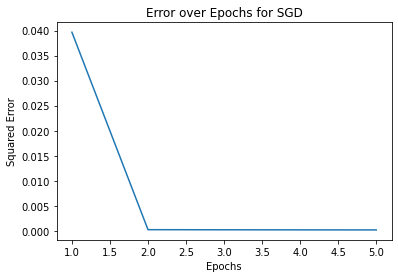

In [51]:
sgd = True
if train:
    usegpu=True
    if torch.cuda.is_available() and usegpu:
        device = torch.device("cuda:0")
        print("Running on GPU")
    else:
        device = torch.device("cpu")
    net.to(device)
    if sgd:
        net.train_sgd(X, Y, 100000, lr = 1e-2)
    else:
        net.train_gd(X, Y, 2000, lr = 1e-3, usegpu = usegpu)
    torch.save(net.state_dict(), model_path)

In [52]:
print(model_path)

./models/model_sgd_3_O100_params.pt


In [53]:
n = Net(d, loss=MSELoss(reduction="sum"),epochs=5, categorical = False)
n.load_state_dict(torch.load(model_path))


<All keys matched successfully>